In [1]:
import ROOT

Welcome to JupyROOT 6.28/00


In [2]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import os
import matplotlib.pyplot as plt

This part of the code is for processing ntuples into pandas data frames with a list of branches and batch size, specifically below is the Monte Carlo simulation for $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\lambda_c^{+}\rightarrow p k^{-} \pi^{+}$

In [3]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
files

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root',
 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']

In [4]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuple):
    file = uproot.open(dir_path + "/" + ntuple)
    tree = file["CharmAnalysis;1"]
    return tree

#takes event #, list of branches, and batch size: returns tuple of branches with data
def show(event, TTree, branches, batch_size):
    #if we want the entire data set set batch size = 0
    if batch_size == 0:
        batch_size = TTree.num_entries

    #iterates through TTree as generator functiona and yields batches of data
    current_event = 0
    for array in TTree.iterate(branches, step_size = batch_size, library = "pd"):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays

In [5]:
TTree = process_ntuple(files[0])
TTree.name

'CharmAnalysis'

In [6]:
df = show(0, TTree, ["DMesons_pt", "DMesons_m", "DMesons_eta", "DMesons_phi"], 1000)

#drop empty rows
empty_indices = [i for i, x in enumerate(df['DMesons_pt']) if len(x) == 0]
df = df.drop(empty_indices)
df = df.reset_index(drop=True)
df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[5735.74853515625, 5735.74853515625]","[1860.0809326171875, 2207.808349609375]","[0.9682132005691528, 0.9682132005691528]","[1.2285282611846924, 1.2285282611846924]"
1,[10047.125],[1862.4176025390625],[0.08182407170534134],[2.709681510925293]
2,"[18993.7421875, 18993.7421875]","[1853.90625, 2398.886962890625]","[-1.6619627475738525, -1.6619627475738525]","[-0.46051180362701416, -0.46051180362701416]"
3,"[10118.494140625, 10118.494140625]","[1874.203125, 2468.1806640625]","[0.041659336537122726, 0.041659336537122726]","[0.780849277973175, 0.780849277973175]"
4,"[12579.470703125, 12579.470703125]","[1884.987060546875, 2220.384521484375]","[-1.1025604009628296, -1.1025604009628296]","[0.7788794040679932, 0.7788794040679932]"
...,...,...,...,...
556,"[5451.50732421875, 5451.50732421875]","[1849.396240234375, 2459.749755859375]","[-0.064152292907238, -0.064152292907238]","[2.395824909210205, 2.395824909210205]"
557,"[30662.75, 30662.75, 30662.75]","[1872.678955078125, 2392.157470703125, 2270.92...","[1.7234350442886353, 1.7234350442886353, 1.723...","[-0.5089108347892761, -0.5089108347892761, -0...."
558,"[11592.576171875, 11592.576171875]","[1850.5804443359375, 2294.733642578125]","[-0.22858543694019318, -0.22858543694019318]","[0.2433209866285324, 0.2433209866285324]"
559,[9751.6259765625],[2263.62890625],[-0.15377356112003326],[-1.8734217882156372]


In [7]:
TTree2 = process_ntuple(files[0])


df2 = show(0, TTree2, ['TruthParticles_Selected_daughterInfoT__pt', 'TruthParticles_Selected_daughterInfoT__phi','TruthParticles_Selected_daughterInfoT__eta', 'TruthParticles_Selected_daughterInfoT__pdgId'], 100)
empty_indices2 = [i for i, x in enumerate(df2['TruthParticles_Selected_daughterInfoT__pt']) if len(x) == 0]
df2 = df2.drop(empty_indices2)
df2 = df2.reset_index(drop=True)
df2

,TruthParticles_Selected_daughterInfoT__pt,TruthParticles_Selected_daughterInfoT__phi,TruthParticles_Selected_daughterInfoT__eta,TruthParticles_Selected_daughterInfoT__pdgId
0,"((1123.1682, 3878.585, 958.6866))","((1.2170534, 1.3581188, 0.70865583))","((1.0610737, 0.8769237, 1.0839401))","((-321, 211, 211))"
1,"((6099.8413, 1293.4324, 2749.1514))","((2.6134217, 2.7200499, 2.921711))","((0.16281185, 0.01096963, -0.0618442))","((-321, 211, 211))"
2,"((6289.112, 6667.3516, 6242.084, 28.585157))","((-0.37195462, -0.4972521, -0.5173161, -0.4602...","((-1.6081908, -1.7318903, -1.6300088, -1.675798))","((-321, 211, 211, 22))"
3,"((9216.71, 35438.234, 17588.225))","((1.943759, 1.9455862, 1.9117515))","((1.9568142, 1.9821448, 1.9503908))","((-321, 211, 211))"
4,"((2002.057, 217.7519, 3713.5286))","((-2.5672243, -2.1763499, -2.424952))","((-1.141573, -2.3164506, -1.0353537))","((-321, 211, 211))"
...,...,...,...,...
95,"((17283.592, 11127.83, 2269.0156))","((-1.2229255, -1.1584013, -1.2499286))","((1.0530417, 0.96933776, 1.0846719))","((-321, 211, 211))"
96,"((2717.658, 2378.877, 3322.9329))","((1.999257, 1.7257324, 2.1980765))","((-0.9154043, -0.8531621, -0.92165047))","((-321, 211, 211))"
97,"((4168.7734, 4860.371, 5686.8403))","((1.6158586, 1.8247527, 1.7706314))","((1.2174535, 1.3751649, 1.3461574))","((-321, 211, 211))"
98,"((2238.6755, 2704.6172, 1943.9313, 0.03954884))","((-0.99995846, -1.284502, -1.5321594, -1.16269...","((0.8392169, 0.56356186, 0.6247644, 0.7225411))","((-321, 211, 211, 22))"


This section is for ROOT plotting and analysis

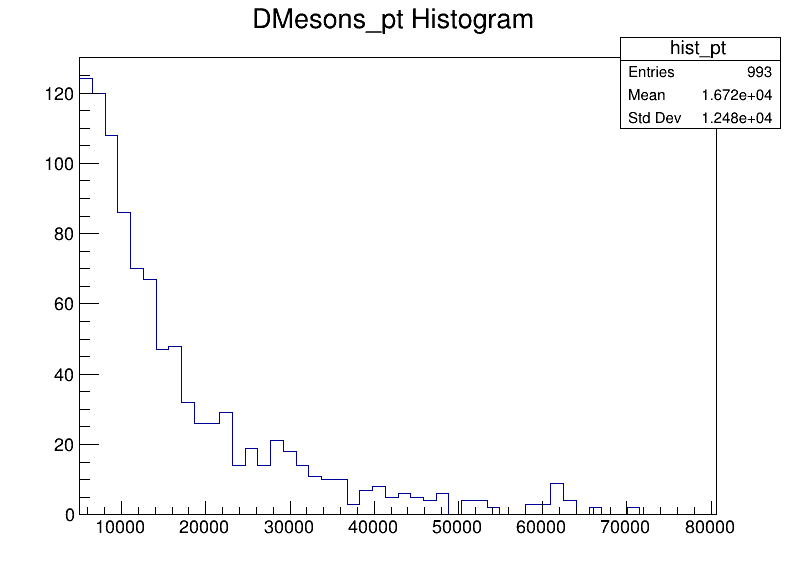

In [8]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    DMesons_pt.extend(pt)

nbins = 50
xmin = np.min(df["DMesons_pt"])
xmax = np.max(df["DMesons_pt"])

hist = ROOT.TH1F("hist_pt", "DMesons_pt Histogram", nbins, xmin, xmax)

for i in range(len(df["DMesons_pt"])):
    pt = df["DMesons_pt"][i]
    for val in pt:
        hist.Fill(val)

# Draw the histogram
c = ROOT.TCanvas("c", "c", 800, 600)
hist.Draw()
c.Draw()

Creating Dalitz plot for Monte Carlo $D^{+}\rightarrow k^{-} \pi^{+} \pi^{+}$ and $\lambda_c^{+}\rightarrow p k^{-} \pi^{+}$, Using TLorentzVectors does it agree with CLEO (https://arxiv.org/pdf/0707.3060.pdf)>

In [47]:
k_mass = 0.493677 
pi_mass = 0.13957061 

TLorentzVectorList = []
for index, row in df2.iterrows():
    pts = row['TruthParticles_Selected_daughterInfoT__pt'][0]
    etas = row['TruthParticles_Selected_daughterInfoT__eta'][0]
    phis = row['TruthParticles_Selected_daughterInfoT__phi'][0]
    pdgids = row['TruthParticles_Selected_daughterInfoT__pdgId'][0]

    # Loop over the values and create the TLorentz vectors
    for pt, eta, phi, pdgid in zip(pts, etas, phis, pdgids):
        if pdgid == 211:
            m = pi_mass
        elif pdgid == -321:
            m = k_mass
        else:
            print("Skipping {}".format(index))
            continue

        # Create the TLorentz vector
        p = ROOT.TLorentzVector()
        p.SetPtEtaPhiM(pt, eta, phi, m)
        TLorentzVectorList.append(p)
    #print(f"Event {index}: {len(TLorentzVectorList)} particles")
    #print(len(TLorentzVectorList))

Skipping 2
Skipping 6
Skipping 31
Skipping 33
Skipping 34
Skipping 42
Skipping 45
Skipping 47
Skipping 68
Skipping 82
Skipping 89
Skipping 89
Skipping 91
Skipping 98
Skipping 99


In [55]:
inv_mass_squared = lambda p1, p2: (p1 + p2).M2()

In [158]:
bins = np.linspace(0, 1.5, 100)
hist, x_edges, y_edges = np.histogram2d([], [], bins=[bins, bins])

In [159]:
TLorentzVectorsInvMass = []

for i in range(len(TLorentzVectorList) - 1):
    j = i + 1
    if i % 3 == 0 & i != 0:
        continue
    kaon = TLorentzVectorList[i] 
    pion = TLorentzVectorList[j]
    m_squared = inv_mass_squared(kaon, pion)
    hist += np.histogram2d([m_squared], [kaon.M2()], bins=[bins, bins])[0]
    TLorentzVectorsInvMass.append(m_squared)

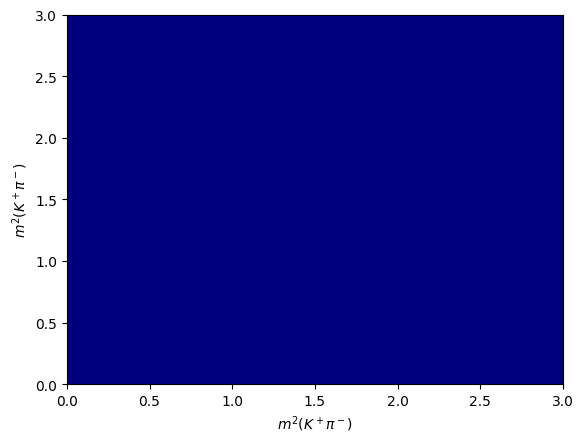

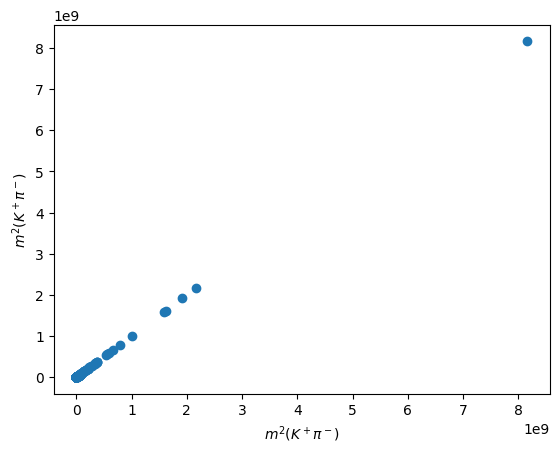

In [190]:
plt.imshow(hist.T, origin='lower', extent=[0, 3, 0, 3], aspect='auto', cmap='jet')
plt.xlabel(r'$m^2(K^+\pi^-)$')
plt.ylabel(r'$m^2(K^+\pi^-$)')
plt.show()

plt.scatter(TLorentzVectorsInvMass, TLorentzVectorsInvMass)
plt.xlabel(r'$m^2(K^+\pi^-)$')
plt.ylabel(r'$m^2(K^+\pi^-$)')
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.show()

In [187]:
print(min(TLorentzVectorsInvMass))
print(max(TLorentzVectorsInvMass))

3319.4506549835205
8158913569.183803


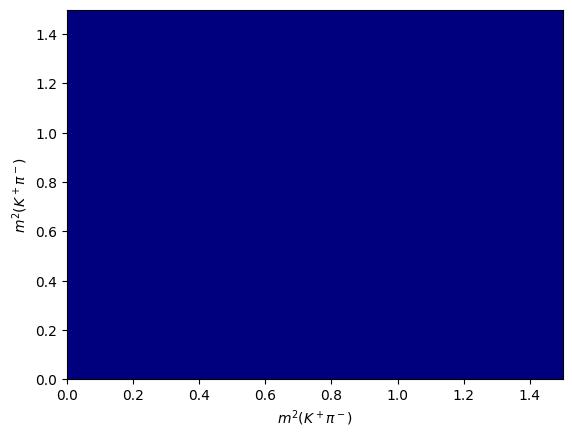